<a href="https://colab.research.google.com/github/zdanielshi/data_science_LFZ/blob/main/DS0622_multiple_regression_cars.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup

In [410]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import RobustScaler, MinMaxScaler, MaxAbsScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [411]:
cars = pd.read_csv('/content/imports-85.data', header=None)

In [412]:
cars.rename(columns={25:'price'}, inplace=True)
cars

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


In [413]:
cars.isnull().sum()

0        0
1        0
2        0
3        0
4        0
5        0
6        0
7        0
8        0
9        0
10       0
11       0
12       0
13       0
14       0
15       0
16       0
17       0
18       0
19       0
20       0
21       0
22       0
23       0
24       0
price    0
dtype: int64

In [414]:
cars.price.value_counts()

?        4
8921     2
18150    2
8845     2
8495     2
        ..
45400    1
16503    1
5389     1
6189     1
22625    1
Name: price, Length: 187, dtype: int64

In [415]:
cars = cars[cars.price != '?']
cars['price'] = cars['price'].astype(float)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [416]:
cars.price.value_counts()

8921.0     2
18150.0    2
8845.0     2
8495.0     2
7609.0     2
          ..
45400.0    1
16503.0    1
5389.0     1
6189.0     1
22625.0    1
Name: price, Length: 186, dtype: int64

* Nulls
* Cleaning
* Categoricals vs numerical
* Encoding categoricals
* Transforming numericals
* Scaling numericals

# Cleaning


In [417]:
cars.head()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [418]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201 entries, 0 to 204
Data columns (total 26 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       201 non-null    int64  
 1   1       201 non-null    object 
 2   2       201 non-null    object 
 3   3       201 non-null    object 
 4   4       201 non-null    object 
 5   5       201 non-null    object 
 6   6       201 non-null    object 
 7   7       201 non-null    object 
 8   8       201 non-null    object 
 9   9       201 non-null    float64
 10  10      201 non-null    float64
 11  11      201 non-null    float64
 12  12      201 non-null    float64
 13  13      201 non-null    int64  
 14  14      201 non-null    object 
 15  15      201 non-null    object 
 16  16      201 non-null    int64  
 17  17      201 non-null    object 
 18  18      201 non-null    object 
 19  19      201 non-null    object 
 20  20      201 non-null    float64
 21  21      201 non-null    object 
 22  22

# Categoricals vs numericals

In [419]:
# 1, 19, 18 from objects to floats / ints

## Cleaning up col 1

In [420]:
col1 = cars[cars[1] != '?']
col1[1] = col1[1].astype(float)
col1.corr()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,0,1,9,10,11,12,13,16,20,23,24,price
0,1.000000,0.528667,-0.522159,-0.334736,-0.208303,-0.516420,-0.246281,-0.169342,-0.141755,0.013028,0.078220,-0.144078
1,0.528667,1.000000,-0.074362,0.023220,0.105073,-0.432335,0.119893,0.167365,-0.132654,-0.258502,-0.210768,0.203254
9,-0.522159,-0.074362,1.000000,0.871641,0.811949,0.558956,0.808489,0.650577,0.295342,-0.535380,-0.572540,0.726600
10,-0.334736,0.023220,0.871641,1.000000,0.837930,0.496802,0.869949,0.716208,0.190043,-0.683543,-0.690581,0.756060
11,-0.208303,0.105073,0.811949,0.837930,1.000000,0.283885,0.870256,0.756317,0.261152,-0.644124,-0.674959,0.841883
12,-0.516420,-0.432335,0.558956,0.496802,0.283885,1.000000,0.358663,0.174557,0.236149,-0.112150,-0.146788,0.224936
13,-0.246281,0.119893,0.808489,0.869949,0.870256,0.358663,1.000000,0.867894,0.226822,-0.732746,-0.765103,0.891750
16,-0.169342,0.167365,0.650577,0.716208,0.756317,0.174557,0.867894,1.000000,0.146519,-0.599425,-0.625054,0.807566
20,-0.141755,-0.132654,0.295342,0.190043,0.261152,0.236149,0.226822,0.146519,1.000000,0.278269,0.223595,0.209138
23,0.013028,-0.258502,-0.535380,-0.683543,-0.644124,-0.112150,-0.732746,-0.599425,0.278269,1.000000,0.972996,-0.678644


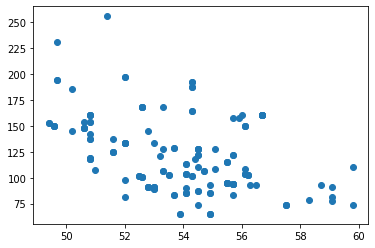

In [421]:
plt.scatter(col1[12],col1[1])

In [422]:
col1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 164 entries, 3 to 204
Data columns (total 26 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       164 non-null    int64  
 1   1       164 non-null    float64
 2   2       164 non-null    object 
 3   3       164 non-null    object 
 4   4       164 non-null    object 
 5   5       164 non-null    object 
 6   6       164 non-null    object 
 7   7       164 non-null    object 
 8   8       164 non-null    object 
 9   9       164 non-null    float64
 10  10      164 non-null    float64
 11  11      164 non-null    float64
 12  12      164 non-null    float64
 13  13      164 non-null    int64  
 14  14      164 non-null    object 
 15  15      164 non-null    object 
 16  16      164 non-null    int64  
 17  17      164 non-null    object 
 18  18      164 non-null    object 
 19  19      164 non-null    object 
 20  20      164 non-null    float64
 21  21      164 non-null    object 
 22  22

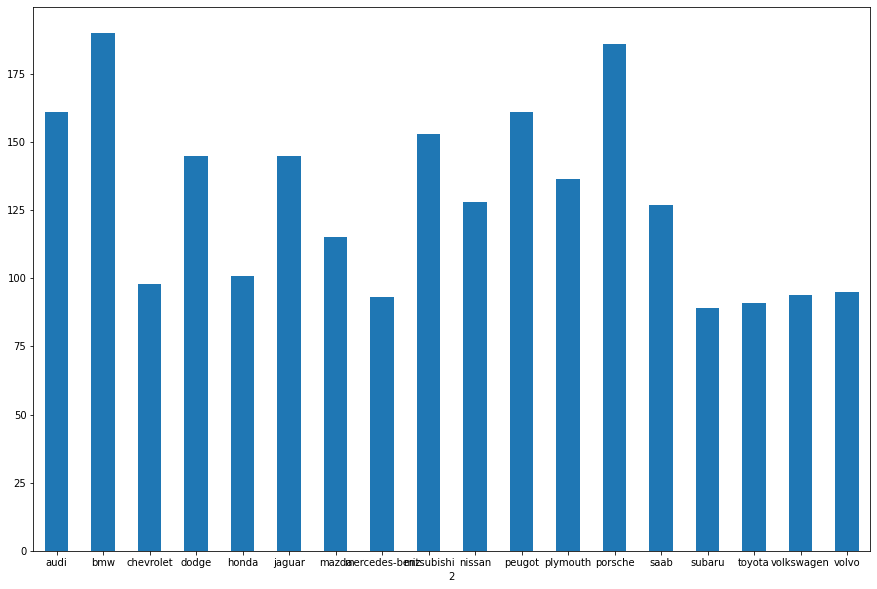

In [423]:
col1.groupby(2)[1].median().plot(kind='bar', rot = 0, figsize = (15,10))

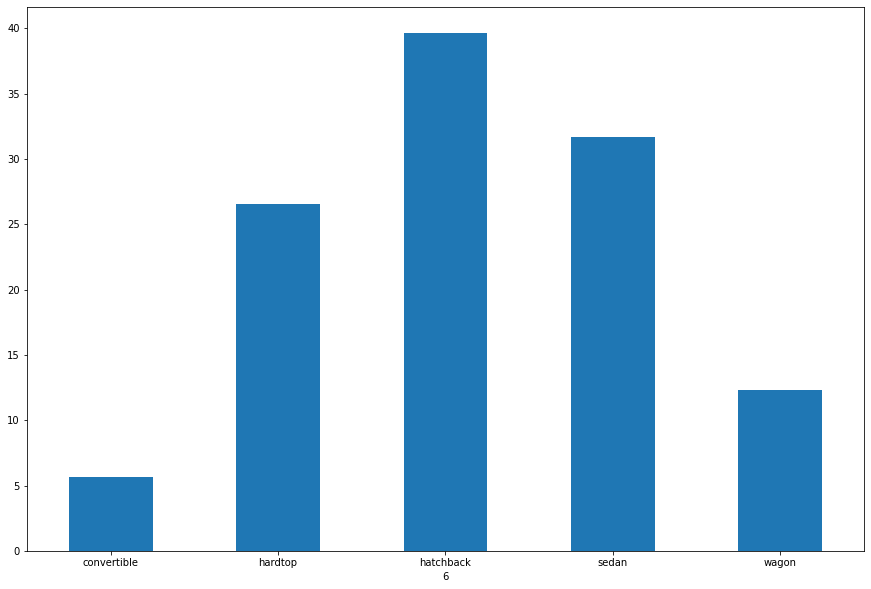

In [424]:
col1.groupby(6)[1].std().plot(kind='bar', rot = 0, figsize = (15,10))

In [425]:
cars[1].replace('?', np.nan, inplace=True)
cars[1].fillna(cars.groupby(6)[1].transform('median'),inplace=True)
cars.isnull().sum()

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


0        0
1        0
2        0
3        0
4        0
5        0
6        0
7        0
8        0
9        0
10       0
11       0
12       0
13       0
14       0
15       0
16       0
17       0
18       0
19       0
20       0
21       0
22       0
23       0
24       0
price    0
dtype: int64

In [426]:
cars[1] = cars[1].astype(float)
cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201 entries, 0 to 204
Data columns (total 26 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       201 non-null    int64  
 1   1       201 non-null    float64
 2   2       201 non-null    object 
 3   3       201 non-null    object 
 4   4       201 non-null    object 
 5   5       201 non-null    object 
 6   6       201 non-null    object 
 7   7       201 non-null    object 
 8   8       201 non-null    object 
 9   9       201 non-null    float64
 10  10      201 non-null    float64
 11  11      201 non-null    float64
 12  12      201 non-null    float64
 13  13      201 non-null    int64  
 14  14      201 non-null    object 
 15  15      201 non-null    object 
 16  16      201 non-null    int64  
 17  17      201 non-null    object 
 18  18      201 non-null    object 
 19  19      201 non-null    object 
 20  20      201 non-null    float64
 21  21      201 non-null    object 
 22  22

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


## Cleaning up Col 18 and 19

In [427]:
cars[cars[18] == "?"]

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,price
55,3,150.0,mazda,gas,std,two,hatchback,rwd,front,95.3,...,70,4bbl,?,?,9.4,101,6000,17,23,10945.0
56,3,150.0,mazda,gas,std,two,hatchback,rwd,front,95.3,...,70,4bbl,?,?,9.4,101,6000,17,23,11845.0
57,3,150.0,mazda,gas,std,two,hatchback,rwd,front,95.3,...,70,4bbl,?,?,9.4,101,6000,17,23,13645.0
58,3,150.0,mazda,gas,std,two,hatchback,rwd,front,95.3,...,80,mpfi,?,?,9.4,135,6000,16,23,15645.0


In [428]:
cars[cars[2] == 'mazda']

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,price
50,1,104.0,mazda,gas,std,two,hatchback,fwd,front,93.1,...,91,2bbl,3.03,3.15,9.0,68,5000,30,31,5195.0
51,1,104.0,mazda,gas,std,two,hatchback,fwd,front,93.1,...,91,2bbl,3.03,3.15,9.0,68,5000,31,38,6095.0
52,1,104.0,mazda,gas,std,two,hatchback,fwd,front,93.1,...,91,2bbl,3.03,3.15,9.0,68,5000,31,38,6795.0
53,1,113.0,mazda,gas,std,four,sedan,fwd,front,93.1,...,91,2bbl,3.03,3.15,9.0,68,5000,31,38,6695.0
54,1,113.0,mazda,gas,std,four,sedan,fwd,front,93.1,...,91,2bbl,3.08,3.15,9.0,68,5000,31,38,7395.0
55,3,150.0,mazda,gas,std,two,hatchback,rwd,front,95.3,...,70,4bbl,?,?,9.4,101,6000,17,23,10945.0
56,3,150.0,mazda,gas,std,two,hatchback,rwd,front,95.3,...,70,4bbl,?,?,9.4,101,6000,17,23,11845.0
57,3,150.0,mazda,gas,std,two,hatchback,rwd,front,95.3,...,70,4bbl,?,?,9.4,101,6000,17,23,13645.0
58,3,150.0,mazda,gas,std,two,hatchback,rwd,front,95.3,...,80,mpfi,?,?,9.4,135,6000,16,23,15645.0
59,1,129.0,mazda,gas,std,two,hatchback,fwd,front,98.8,...,122,2bbl,3.39,3.39,8.6,84,4800,26,32,8845.0


In [429]:
cars[18].replace('?', np.nan, inplace=True)
cars[19].replace('?', np.nan, inplace=True)
cars[18].fillna(cars[cars[2] == 'mazda'][18].median(), inplace=True)
cars[19].fillna(cars[cars[2] == 'mazda'][19].median(), inplace=True)
cars.isnull().sum()

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inpla

0        0
1        0
2        0
3        0
4        0
5        0
6        0
7        0
8        0
9        0
10       0
11       0
12       0
13       0
14       0
15       0
16       0
17       0
18       0
19       0
20       0
21       0
22       0
23       0
24       0
price    0
dtype: int64

In [430]:
cars[18] = cars[18].astype(float)
cars[19] = cars[19].astype(float)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [431]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201 entries, 0 to 204
Data columns (total 26 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       201 non-null    int64  
 1   1       201 non-null    float64
 2   2       201 non-null    object 
 3   3       201 non-null    object 
 4   4       201 non-null    object 
 5   5       201 non-null    object 
 6   6       201 non-null    object 
 7   7       201 non-null    object 
 8   8       201 non-null    object 
 9   9       201 non-null    float64
 10  10      201 non-null    float64
 11  11      201 non-null    float64
 12  12      201 non-null    float64
 13  13      201 non-null    int64  
 14  14      201 non-null    object 
 15  15      201 non-null    object 
 16  16      201 non-null    int64  
 17  17      201 non-null    object 
 18  18      201 non-null    float64
 19  19      201 non-null    float64
 20  20      201 non-null    float64
 21  21      201 non-null    object 
 22  22

## Clean up 21, 22

In [432]:
cars[cars[21] == '?']

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,price
130,0,85.0,renault,gas,std,four,wagon,fwd,front,96.1,...,132,mpfi,3.46,3.9,8.7,?,?,23,31,9295.0
131,2,129.0,renault,gas,std,two,hatchback,fwd,front,96.1,...,132,mpfi,3.46,3.9,8.7,?,?,23,31,9895.0


In [433]:
cars[cars[22] == '?']

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,price
130,0,85.0,renault,gas,std,four,wagon,fwd,front,96.1,...,132,mpfi,3.46,3.9,8.7,?,?,23,31,9295.0
131,2,129.0,renault,gas,std,two,hatchback,fwd,front,96.1,...,132,mpfi,3.46,3.9,8.7,?,?,23,31,9895.0


In [447]:
cars[21].replace('?', np.nan, inplace=True)
cars[22].replace('?', np.nan, inplace=True)
cars.dropna(inplace=True)
cars.isnull().sum().sum()

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


0

In [448]:
cars[21] = cars[21].astype(float)
cars[22] = cars[22].astype(float)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [449]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 199 entries, 0 to 204
Data columns (total 26 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       199 non-null    object 
 1   1       199 non-null    float64
 2   2       199 non-null    object 
 3   3       199 non-null    object 
 4   4       199 non-null    object 
 5   5       199 non-null    object 
 6   6       199 non-null    object 
 7   7       199 non-null    object 
 8   8       199 non-null    object 
 9   9       199 non-null    float64
 10  10      199 non-null    float64
 11  11      199 non-null    float64
 12  12      199 non-null    float64
 13  13      199 non-null    int64  
 14  14      199 non-null    object 
 15  15      199 non-null    object 
 16  16      199 non-null    int64  
 17  17      199 non-null    object 
 18  18      199 non-null    float64
 19  19      199 non-null    float64
 20  20      199 non-null    float64
 21  21      199 non-null    float64
 22  22

# Encoding categoricals

Categoricals to encode:
* 0
* 2
* 3
* 4
* 5
* 6
* 7
* 8
* 14
* 15
* 17

Numericals
* 1
* 9
* 10
* 11
* 12
* 13
* 16
* 18
* 19
* 20
* 21
* 22
* 23
* 24

Target
* price

In [450]:
cars.head()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,price
0,3,138.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,138.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,129.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


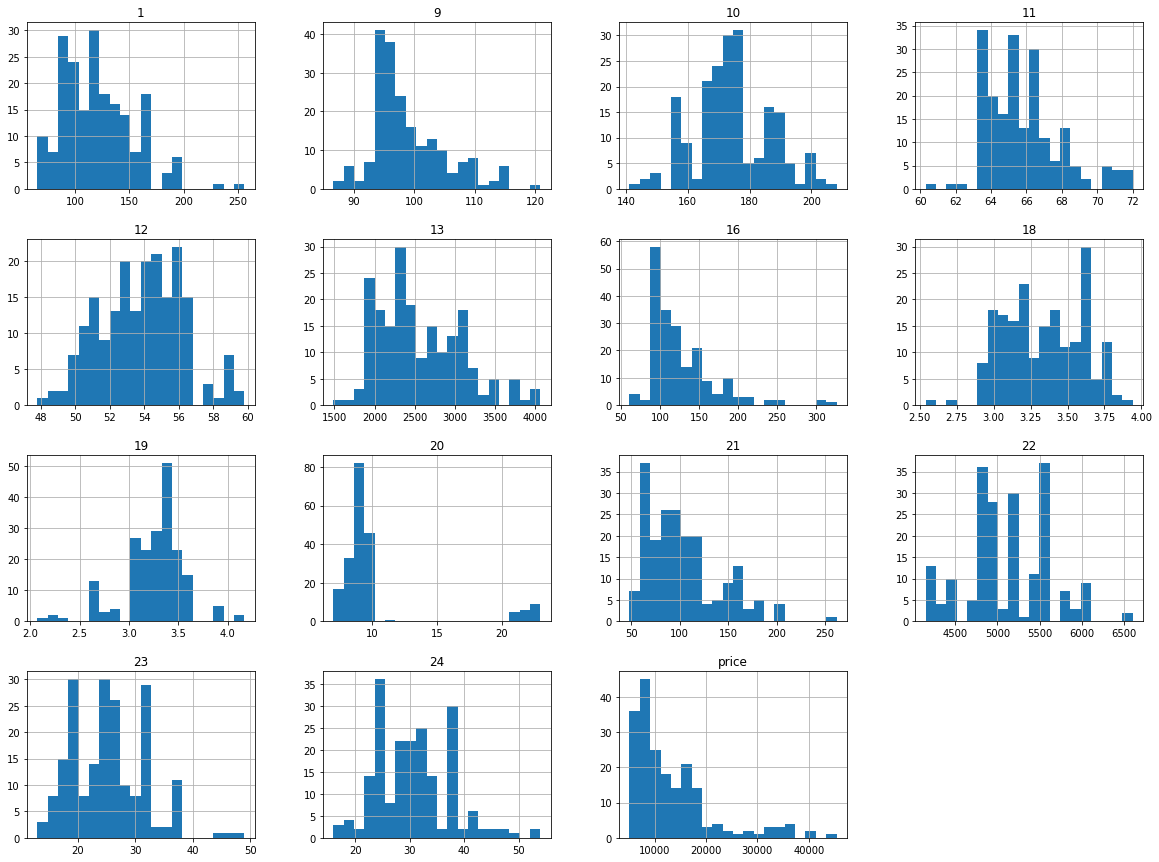

In [451]:
cars.hist(figsize = (20,15), bins = 20);

## Converting 0 to an object

In [452]:
cars[0] = cars[0].astype(str)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [453]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 199 entries, 0 to 204
Data columns (total 26 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       199 non-null    object 
 1   1       199 non-null    float64
 2   2       199 non-null    object 
 3   3       199 non-null    object 
 4   4       199 non-null    object 
 5   5       199 non-null    object 
 6   6       199 non-null    object 
 7   7       199 non-null    object 
 8   8       199 non-null    object 
 9   9       199 non-null    float64
 10  10      199 non-null    float64
 11  11      199 non-null    float64
 12  12      199 non-null    float64
 13  13      199 non-null    int64  
 14  14      199 non-null    object 
 15  15      199 non-null    object 
 16  16      199 non-null    int64  
 17  17      199 non-null    object 
 18  18      199 non-null    float64
 19  19      199 non-null    float64
 20  20      199 non-null    float64
 21  21      199 non-null    float64
 22  22

In [454]:
cars_encoded = pd.get_dummies(cars)

In [455]:
cars_encoded.keys()

Index([                1,                 9,                10,
                      11,                12,                13,
                      16,                18,                19,
                      20,                21,                22,
                      23,                24,           'price',
                  '0_-1',            '0_-2',             '0_0',
                   '0_1',             '0_2',             '0_3',
         '2_alfa-romero',          '2_audi',           '2_bmw',
           '2_chevrolet',         '2_dodge',         '2_honda',
               '2_isuzu',        '2_jaguar',         '2_mazda',
       '2_mercedes-benz',       '2_mercury',    '2_mitsubishi',
              '2_nissan',        '2_peugot',      '2_plymouth',
             '2_porsche',          '2_saab',        '2_subaru',
              '2_toyota',    '2_volkswagen',         '2_volvo',
              '3_diesel',           '3_gas',           '4_std',
               '4_turbo',             '5

# Transforming numericals

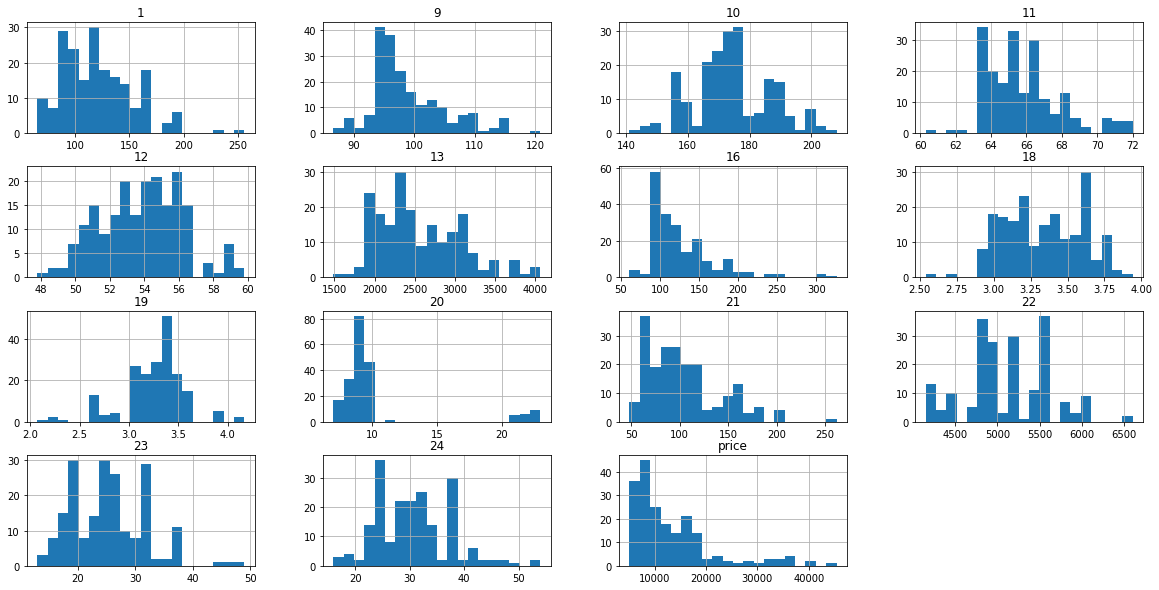

In [456]:
cars.hist(figsize = (20,10), bins = 20);

In [457]:
print('1 skew - ' + str(cars[1].skew())) # transform
print('9 skew - ' + str(cars[9].skew())) # transform
print('10 skew - ' + str(cars[10].skew()))
print('11 skew - ' + str(cars[11].skew())) # transform
print('12 skew - ' + str(cars[12].skew())) 
print('13 skew - ' + str(cars[13].skew()))
print('16 skew - ' + str(cars[16].skew())) # transform
print('18 skew - ' + str(cars[18].skew()))
print('19 skew - ' + str(cars[19].skew()))
print('20 skew - ' + str(cars[20].skew())) # transform
print('21 skew - ' + str(cars[21].skew())) # transform
print('22 skew - ' + str(cars[22].skew())) 
print('23 skew - ' + str(cars[23].skew()))
print('24 skew - ' + str(cars[24].skew()))

1 skew - 0.8328310859404592
9 skew - 1.016676128870266
10 skew - 0.16523679664100577
11 skew - 0.8812622850762944
12 skew - 0.02920176828569172
13 skew - 0.7004405093366182
16 skew - 1.9735956839887074
18 skew - -0.03255104209169718
19 skew - -0.790261832078022
20 skew - 2.5663897565066693
21 skew - 1.141584284163145
22 skew - 0.10772928657030856
23 skew - 0.668379832171857
24 skew - 0.5482182068751039


## Transform: 1, 9, 11, 16, 20, 21

In [458]:
# 1
np.log(cars[1]).skew()

0.11771841053559345

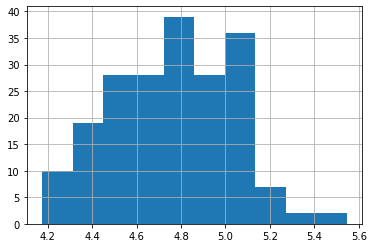

In [459]:
cars_encoded[1] = np.log(cars[1])
cars_encoded[1].hist();

In [460]:
# 9
(1/cars[9]).skew()

-0.6860514065535738

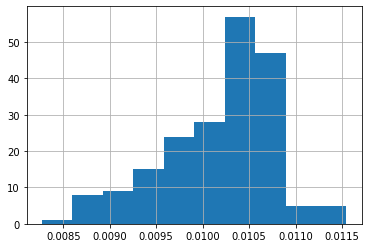

In [461]:
cars_encoded[9] = (1/cars[9])
cars_encoded[9].hist();

In [462]:
#11
np.sqrt(cars[11]).skew()

0.8370124036858365

In [463]:
np.log(cars[11]).skew()

0.7925275841119028

In [464]:
(1/cars[11]).skew()

-0.7027253745118853

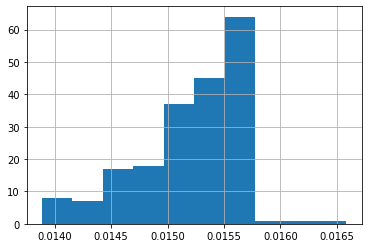

In [465]:
cars_encoded[11] = (1/cars[11])
cars_encoded[11].hist();

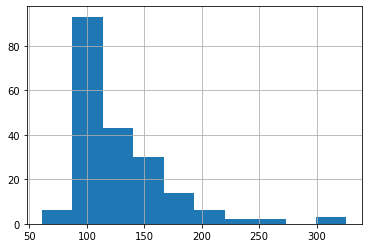

In [466]:
# 16
cars[16].hist();

In [467]:
np.log(cars[16]).skew()

0.8723196475475801

In [468]:
np.sqrt(cars[16]).skew()

1.38512732811498

In [469]:
(1/cars[16]).skew()

0.036687243829763884

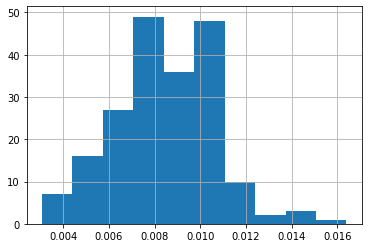

In [470]:
cars_encoded[16] = (1/cars[16])
cars_encoded[16].hist();

In [471]:
# 20

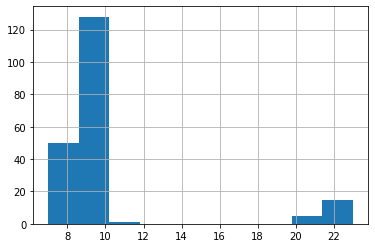

In [472]:
cars[20].hist()

In [473]:
np.log(cars[20]).skew()

2.3239283401177273

In [474]:
np.sqrt(cars[20]).skew()

2.4688457633763043

In [475]:
(1/cars[20]).skew()

-1.8368572207280782

(array([ 6.,  5.,  7., 10., 27., 65., 58.,  0.,  1., 20.]),
 array([0.31900589, 0.31907684, 0.3191478 , 0.31921876, 0.31928972,
        0.31936068, 0.31943164, 0.31950259, 0.31957355, 0.31964451,
        0.31971547]),
 <a list of 10 Patch objects>)

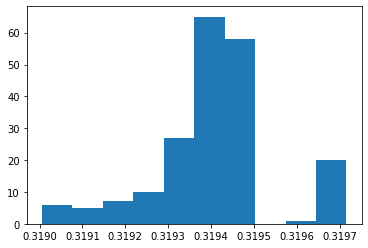

In [476]:
trans20 = list(stats.boxcox(cars[20])[0])
plt.hist(trans20)

In [477]:
pd.DataFrame(trans20).skew()

0    0.031527
dtype: float64

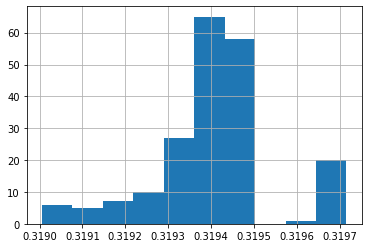

In [478]:
cars_encoded[16] = trans20
cars_encoded[16].hist();

In [479]:
# 21

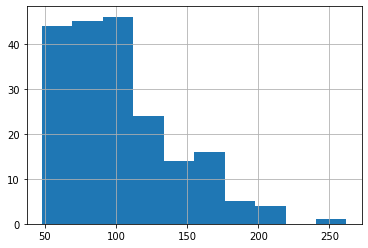

In [480]:
cars[21].hist()

In [481]:
np.log(cars[21]).skew()

0.38993684894241953

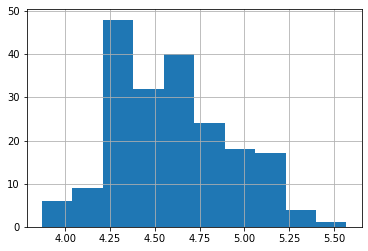

In [482]:
cars_encoded[21] = np.log(cars[21])
cars_encoded[21].hist()

In [483]:
print('1 skew - ' + str(cars_encoded[1].skew())) # transform
print('9 skew - ' + str(cars_encoded[9].skew())) # transform
print('10 skew - ' + str(cars_encoded[10].skew()))
print('11 skew - ' + str(cars_encoded[11].skew())) # transform
print('12 skew - ' + str(cars_encoded[12].skew())) 
print('13 skew - ' + str(cars_encoded[13].skew()))
print('16 skew - ' + str(cars_encoded[16].skew())) # transform
print('18 skew - ' + str(cars_encoded[18].skew()))
print('19 skew - ' + str(cars_encoded[19].skew()))
print('20 skew - ' + str(cars_encoded[20].skew())) # transform
print('21 skew - ' + str(cars_encoded[21].skew())) # transform
print('22 skew - ' + str(cars_encoded[22].skew())) 
print('23 skew - ' + str(cars_encoded[23].skew()))
print('24 skew - ' + str(cars_encoded[24].skew()))

1 skew - 0.11771841053559345
9 skew - -0.6860514065535738
10 skew - 0.16523679664100577
11 skew - -0.7027253745118853
12 skew - 0.02920176828569172
13 skew - 0.7004405093366182
16 skew - 0.031527425374100505
18 skew - -0.03255104209169718
19 skew - -0.790261832078022
20 skew - 2.5663897565066693
21 skew - 0.38993684894241953
22 skew - 0.10772928657030856
23 skew - 0.668379832171857
24 skew - 0.5482182068751039


# Scaling numericals

In [776]:
cars_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 199 entries, 0 to 204
Data columns (total 80 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   1                199 non-null    float64
 1   9                199 non-null    float64
 2   10               199 non-null    float64
 3   11               199 non-null    float64
 4   12               199 non-null    float64
 5   13               199 non-null    int64  
 6   16               199 non-null    float64
 7   18               199 non-null    float64
 8   19               199 non-null    float64
 9   20               199 non-null    float64
 10  21               199 non-null    float64
 11  22               199 non-null    float64
 12  23               199 non-null    int64  
 13  24               199 non-null    int64  
 14  price            199 non-null    float64
 15  0_-1             199 non-null    uint8  
 16  0_-2             199 non-null    uint8  
 17  0_0             

In [778]:
cars_encoded_scaled = cars_encoded.copy()

## Robust Scaler

In [779]:
robust_scaler = RobustScaler().fit(cars[[1, 9, 10, 11, 12, 13, 16, 18, 19, 20, 21, 22, 23, 24]])

In [780]:
cars_encoded_scaled[[1, 9, 10, 11, 12, 13, 16, 18, 19, 20, 21, 22, 23, 24]] = robust_scaler.transform(cars_encoded_scaled[[1, 9, 10, 11, 12, 13, 16, 18, 19, 20, 21, 22, 23, 24]])

## Standard Scaler

In [781]:
# standard_scaler = StandardScaler().fit(cars[[1, 9, 10, 11, 12, 13, 16, 18, 19, 20, 21, 22, 23, 24]])

In [782]:
# cars_encoded_scaled[[1, 9, 10, 11, 12, 13, 16, 18, 19, 20, 21, 22, 23, 24]] = standard_scaler.transform(cars_encoded_scaled[[1, 9, 10, 11, 12, 13, 16, 18, 19, 20, 21, 22, 23, 24]])

## Min Max Scaler

In [783]:
# minmax_scaler = MinMaxScaler().fit(cars[[1, 9, 10, 11, 12, 13, 16, 18, 19, 20, 21, 22, 23, 24]])

In [784]:
# cars_encoded_scaled[[1, 9, 10, 11, 12, 13, 16, 18, 19, 20, 21, 22, 23, 24]] = minmax_scaler.transform(cars_encoded_scaled[[1, 9, 10, 11, 12, 13, 16, 18, 19, 20, 21, 22, 23, 24]])

## MaxAbs Scaler

In [785]:
# maxabs_scaler = MaxAbsScaler().fit(cars[[1, 9, 10, 11, 12, 13, 16, 18, 19, 20, 21, 22, 23, 24]])

In [786]:
# cars_encoded_scaled[[1, 9, 10, 11, 12, 13, 16, 18, 19, 20, 21, 22, 23, 24]] = maxabs_scaler.transform(cars_encoded_scaled[[1, 9, 10, 11, 12, 13, 16, 18, 19, 20, 21, 22, 23, 24]])

In [787]:
cars_encoded_scaled

,1,9,10,11,12,13,16,18,19,20,...,15_twelve,15_two,17_1bbl,17_2bbl,17_4bbl,17_idi,17_mfi,17_mpfi,17_spdi,17_spfi
0,-2.349408,-12.277052,-0.259587,-25.186307,-1.492958,0.173239,-2.608365,0.367816,-2.033333,0.000000,...,0,0,0,0,0,0,0,1,0,0
1,-2.349408,-12.277052,-0.259587,-25.186307,-1.492958,0.173239,-2.608365,0.367816,-2.033333,0.000000,...,0,0,0,0,0,0,0,1,0,0
2,-2.350874,-12.277142,-0.117994,-25.186436,-0.478873,0.528765,-2.608365,-1.448276,0.600000,0.000000,...,0,0,0,0,0,0,0,1,0,0
3,-2.345655,-12.277213,0.200590,-25.186498,0.056338,-0.099548,-2.608363,-0.275862,0.366667,1.176471,...,0,0,0,0,0,0,0,1,0,0
4,-2.345655,-12.277208,0.200590,-25.186515,0.056338,0.530058,-2.608368,-0.275862,0.366667,-1.176471,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-2.357524,-12.277321,0.920354,-25.186725,0.394366,0.695540,-2.608364,1.080460,-0.466667,0.588235,...,0,0,0,0,0,0,0,1,0,0
201,-2.357524,-12.277321,0.920354,-25.186717,0.394366,0.820944,-2.608366,1.080460,-0.466667,-0.352941,...,0,0,0,0,0,0,0,1,0,0
202,-2.357524,-12.277321,0.920354,-25.186725,0.394366,0.773109,-2.608365,0.620690,-1.400000,-0.235294,...,0,0,0,0,0,0,0,1,0,0
203,-2.357524,-12.277321,0.920354,-25.186725,0.394366,1.038138,-2.608358,-0.689655,0.366667,16.470588,...,0,0,0,0,0,1,0,0,0,0


In [788]:
cars_encoded_scaled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 199 entries, 0 to 204
Data columns (total 80 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   1                199 non-null    float64
 1   9                199 non-null    float64
 2   10               199 non-null    float64
 3   11               199 non-null    float64
 4   12               199 non-null    float64
 5   13               199 non-null    float64
 6   16               199 non-null    float64
 7   18               199 non-null    float64
 8   19               199 non-null    float64
 9   20               199 non-null    float64
 10  21               199 non-null    float64
 11  22               199 non-null    float64
 12  23               199 non-null    float64
 13  24               199 non-null    float64
 14  price            199 non-null    float64
 15  0_-1             199 non-null    uint8  
 16  0_-2             199 non-null    uint8  
 17  0_0             

# Performing the Multiple Regression

## Splitting up into test and training sets


In [789]:
xtrain, xtest, ytrain, ytest = train_test_split(cars_encoded_scaled.loc[:,cars_encoded_scaled.columns != 'price'], cars_encoded_scaled.price, test_size = .33, random_state = 7)

In [790]:
xtrain.head(n=5)

,1,9,10,11,12,13,16,18,19,20,...,15_twelve,15_two,17_1bbl,17_2bbl,17_4bbl,17_idi,17_mfi,17_mpfi,17_spdi,17_spfi
54,-2.353752,-12.277121,-0.377581,-25.186317,0.000000,-0.599871,-2.608365,-0.528736,-0.466667,0.000000,...,0,0,0,1,0,0,0,0,0,0
172,-2.350047,-12.277195,0.176991,-25.186445,-0.309859,0.725275,-2.608364,0.712644,0.700000,0.352941,...,0,0,0,0,0,0,0,1,0,0
145,-2.355979,-12.277176,-0.070796,-25.186427,0.056338,0.124111,-2.608369,0.712644,-2.166667,-1.529412,...,0,0,0,0,0,0,0,1,0,0
114,-2.359942,-12.277373,1.516224,-25.186685,1.295775,1.384615,-2.608358,0.896552,0.766667,14.117647,...,0,0,0,0,0,1,0,0,0,0
117,-2.346056,-12.277309,0.796460,-25.186676,0.535211,0.925663,-2.608373,0.689655,-0.266667,-2.352941,...,0,0,0,0,0,0,0,1,0,0


In [791]:
xtest.head(n=5)

,1,9,10,11,12,13,16,18,19,20,...,15_twelve,15_two,17_1bbl,17_2bbl,17_4bbl,17_idi,17_mfi,17_mpfi,17_spdi,17_spfi
88,-2.349566,-12.277167,-0.047198,-25.186427,-0.704225,-0.014221,-2.608370,-0.321839,0.566667,-1.764706,...,0,0,0,0,0,0,0,0,1,0
109,-2.359942,-12.277373,1.516224,-25.186685,1.295775,1.054945,-2.608367,0.344828,-0.333333,-0.705882,...,0,0,0,0,0,0,0,1,0,0
23,-2.352811,-12.277130,-0.938053,-25.186279,-0.929577,-0.369748,-2.608370,-0.643678,0.333333,-1.647059,...,0,0,0,0,0,0,0,1,0,0
12,-2.342686,-12.277230,0.212389,-25.186372,0.056338,0.382676,-2.608365,0.000000,-0.333333,0.000000,...,0,0,0,0,0,0,0,1,0,0
68,-2.357987,-12.277330,1.044248,-25.186837,1.295775,1.727214,-2.608358,0.620690,1.166667,14.705882,...,0,0,0,0,0,1,0,0,0,0


In [792]:
ytrain[:5]

54      7395.0
172    17669.0
145    11259.0
114    17075.0
117    18150.0
Name: price, dtype: float64

In [793]:
ytest[:5]

88      9279.0
109    12440.0
23      7957.0
12     20970.0
68     28248.0
Name: price, dtype: float64

In [794]:
xtrain.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 133 entries, 54 to 181
Data columns (total 79 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   1                133 non-null    float64
 1   9                133 non-null    float64
 2   10               133 non-null    float64
 3   11               133 non-null    float64
 4   12               133 non-null    float64
 5   13               133 non-null    float64
 6   16               133 non-null    float64
 7   18               133 non-null    float64
 8   19               133 non-null    float64
 9   20               133 non-null    float64
 10  21               133 non-null    float64
 11  22               133 non-null    float64
 12  23               133 non-null    float64
 13  24               133 non-null    float64
 14  0_-1             133 non-null    uint8  
 15  0_-2             133 non-null    uint8  
 16  0_0              133 non-null    uint8  
 17  0_1            

In [795]:
xtest.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 66 entries, 88 to 204
Data columns (total 79 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   1                66 non-null     float64
 1   9                66 non-null     float64
 2   10               66 non-null     float64
 3   11               66 non-null     float64
 4   12               66 non-null     float64
 5   13               66 non-null     float64
 6   16               66 non-null     float64
 7   18               66 non-null     float64
 8   19               66 non-null     float64
 9   20               66 non-null     float64
 10  21               66 non-null     float64
 11  22               66 non-null     float64
 12  23               66 non-null     float64
 13  24               66 non-null     float64
 14  0_-1             66 non-null     uint8  
 15  0_-2             66 non-null     uint8  
 16  0_0              66 non-null     uint8  
 17  0_1             

## Running the regression model

In [796]:
cars_regr = LinearRegression().fit(xtrain, ytrain)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


In [797]:
ypred = regression.predict(xtest)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


In [798]:
ypred

array([ 5849.35630345, 15548.68056893, 11735.87857556, 24837.76956654,
       26351.25221205, 17393.33871365,  6095.13474011, 14295.62373781,
        6999.59274435,  5875.72765589, 20046.00475216, 13943.80589318,
       14315.8240211 , 14236.22354388, 14944.90765238,  7895.64775157,
        6551.69816637, 15127.94480586,  8840.60557771, 12282.39170098,
        9618.11223054,  7911.45088267, 13465.59003115, 10607.88512325,
        4731.77455306,  7819.59983087,  7728.7152257 , 22439.31508708,
        6751.66593504, 33083.19163513, 11321.6782043 ,  7809.99294019,
        8811.91524792,  4732.94833922,  8505.22951531,  8232.9075892 ,
       34635.3144424 ,  5741.78147435, 11205.7937305 , 14552.92874098,
        8677.08766747, 16494.31561494,  3809.1916976 ,  8335.04046655,
        8334.193151  ,  7110.25321817,  7345.8306179 ,  8772.1669333 ,
       27114.84514332, 10434.57038403,  9230.53698444,  7240.30149198,
       16485.65014172,  5760.88063025, 15570.95336246,  7835.84774733,
      

## Analyzing the results

In [799]:
mse = mean_squared_error(ytest, ypred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(ytest, ypred)

In [800]:
print('Mean Square Error: ' + str(mse))
print('Root Mean Square Error: ' + str(rmse))
print('Mean Absolute Error: ' + str(mae))

Mean Square Error: 9941385.84377247
Root Mean Square Error: 3152.9963279034228
Mean Absolute Error: 2325.4157074075756


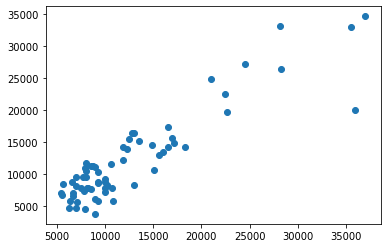

In [801]:
plt.scatter(ytest, ypred)

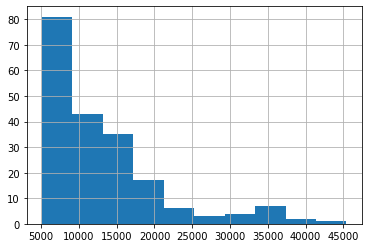

In [802]:
cars.price.hist()